In [10]:
import numpy as np
import pandas as pd
import scipy

from datetime import datetime as dt
from datetime import timedelta as td

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

# Guided Example - Stock Price Modeling

Time series modeling is particularly popular in finance. It's used to model the price movement of almost any asset or commodity. Here we'll use the techniques we covered to model a currency exchange rate, specifically the value of the SP500 stock market index.

The data here comes from the St. Louis Federal Reserve's database, affectionately called FRED and available [here](https://fred.stlouisfed.org). We'll use the S&P 500 data for now, using nine years of data starting Jan 1, 2008.

In [2]:
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

sp_data['DATE'] = pd.to_datetime(sp_data['DATE'])
sp_data['SP500'] = pd.to_numeric(sp_data['SP500'], errors='coerce')
sp_data = sp_data.dropna().reset_index(drop=True)
display(
    sp_data.head(),
    sp_data.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2267 non-null   datetime64[ns]
 1   SP500   2267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB


,DATE,SP500
0,2008-01-02,1447.16
1,2008-01-03,1447.16
2,2008-01-04,1411.63
3,2008-01-07,1416.18
4,2008-01-08,1390.19


None

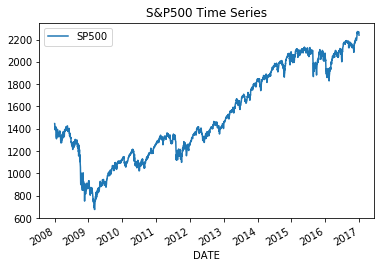

In [3]:
sp_data.plot(x='DATE', y='SP500')
plt.title('S&P500 Time Series')
plt.show()

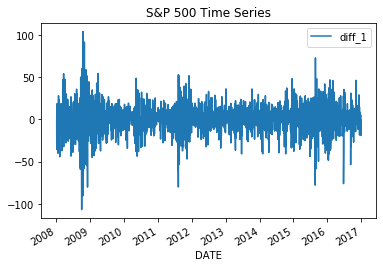

In [4]:
sp_data['diff_1'] = sp_data['SP500'] - sp_data['SP500'].shift()
sp_data.plot(x='DATE', y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

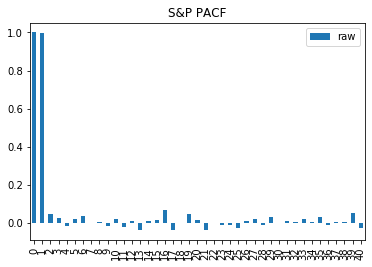

In [8]:
x_acf = pd.DataFrame(pacf(sp_data['SP500']))
x_acf.plot(kind='bar')
plt.title("S&P PACF")
plt.legend(['raw'])
plt.show()

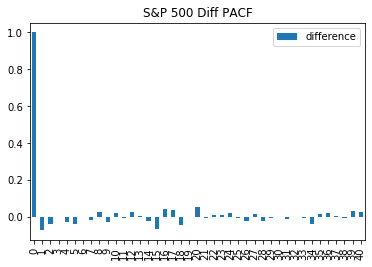

In [9]:
x_acf = pd.DataFrame(pacf(sp_data['diff_1'][1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])
plt.show()

## Building models.

So our initial time series has 1 strong autocorrelation but the differences seem to show no real autocorrelation. Let's build some ARIMA models to experiment and see how we do!

We're going to build a series of models to evaluate, each with slightly different parameters for the ARIMA. Note that the parameteres are passed in (p, d, q) order, corresponding to the AR, I, and MA portions respectively.

Recall how we interpret those attributes. The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

In [21]:
def build_arimamodel(df, col, arimaorder=(1,1,1)):
    model = ARIMA(df[col], order=arimaorder)
    model_fit = model.fit()
    display(f"ARIMA model of order: {arimaorder}",
            model_fit.summary(),
            pd.DataFrame(model_fit.resid.describe(), 
                         columns=['Residual Description'])
    )
    return model_fit

In [22]:
model1 = build_arimamodel(sp_data, 'SP500', (0,1,0))

'ARIMA model of order: (0, 1, 0)'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.SP500   No. Observations:                 2266
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9602.159
Method:                           css   S.D. of innovations             16.753
Date:                Sat, 06 Jun 2020   AIC                          19208.317
Time:                        11:07:39   BIC                          19219.769
Sample:                             1   HQIC                         19212.496
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3494      0.352      0.993      0.321      -0.340       1.039
==============================================================================
"""

,Residual Description
count,2.266000e+03
mean,5.080569e-15
std,1.675631e+01
min,-1.069694e+02
25%,-7.314369e+00
50%,5.206311e-01
75%,8.590631e+00
max,1.037806e+02


In [23]:
model2 = build_arimamodel(sp_data, 'SP500', (1,0,0))

'ARIMA model of order: (1, 0, 0)'

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  SP500   No. Observations:                 2267
Model:                     ARMA(1, 0)   Log Likelihood               -9609.725
Method:                       css-mle   S.D. of innovations             16.753
Date:                Sat, 06 Jun 2020   AIC                          19225.450
Time:                        11:08:13   BIC                          19242.628
Sample:                             0   HQIC                         19231.717
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1703.4393    335.156      5.083      0.000    1046.546    2360.332
ar.L1.SP500     0.9993      0.001   1568.329      0.000       0.998       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

,Residual Description
count,2267.000000
mean,0.103472
std,17.598884
min,-256.279272
25%,-7.102027
50%,0.731893
75%,8.805321
max,103.546928


In [24]:
model3 = build_arimamodel(sp_data, 'SP500', (1,0,1))

'ARIMA model of order: (1, 0, 1)'

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  SP500   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.249
Method:                       css-mle   S.D. of innovations             16.705
Date:                Sat, 06 Jun 2020   AIC                          19214.498
Time:                        11:08:40   BIC                          19237.403
Sample:                             0   HQIC                         19222.855
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1689.0287    338.758      4.986      0.000    1025.075    2352.982
ar.L1.SP500     0.9994      0.001   1775.554      0.000       0.998       1.000
ma.L1.SP500    -0.0787      0.022     -3.614      0.000      -0.121      -0.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1           12.7138           +0.0000j           12.7138            0.0000
-----------------------------------------------------------------------------
"""

,Residual Description
count,2267.000000
mean,0.159660
std,17.462603
min,-241.868734
25%,-7.049666
50%,1.035508
75%,8.751828
max,102.287694


In [26]:
model4 = build_arimamodel(sp_data, 'SP500', (1,1,1))

'ARIMA model of order: (1, 1, 1)'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.SP500   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Sat, 06 Jun 2020   AIC                          19193.947
Time:                        11:09:22   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.SP500     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.SP500    -0.6565      0.144     -4.559      0.000      -0.939      -0.374
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7147           +0.0000j            1.7147            0.0000
MA.1            1.5232           +0.0000j            1.5232            0.0000
-----------------------------------------------------------------------------
"""

,Residual Description
count,2266.000000
mean,-0.002483
std,16.688544
min,-106.294391
25%,-7.452393
50%,1.039107
75%,8.708534
max,96.668758


In [27]:
model5 = build_arimamodel(sp_data, 'SP500', (5,1,5))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


'ARIMA model of order: (5, 1, 5)'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.SP500   No. Observations:                 2266
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9589.074
Method:                       css-mle   S.D. of innovations             16.636
Date:                Sat, 06 Jun 2020   AIC                          19202.148
Time:                        11:09:51   BIC                          19270.857
Sample:                             1   HQIC                         19227.217
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3595      0.289      1.242      0.214      -0.208       0.927
ar.L1.D.SP500    -0.8192      0.160     -5.133      0.000      -1.132      -0.506
ar.L2.D.SP500    -0.4547      0.224     -2.026      0.043      -0.895      -0.015
ar.L3.D.SP500    -0.6547      0.204     -3.207      0.001      -1.055      -0.255
ar.L4.D.SP500    -0.1736      0.224     -0.775      0.438      -0.613       0.265
ar.L5.D.SP500     0.5809      0.159      3.660      0.000       0.270       0.892
ma.L1.D.SP500     0.7459      0.149      4.995      0.000       0.453       1.039
ma.L2.D.SP500     0.3512      0.209      1.678      0.094      -0.059       0.761
ma.L3.D.SP500     0.5679      0.190      2.996      0.003       0.196       0.939
ma.L4.D.SP500     0.0789      0.209      0.378      0.706      -0.331       0.489
ma.L5.D.SP500    -0.6560      0.149     -4.403      0.000      -0.948      -0.364
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9049           -0.4307j            1.0022           -0.4293
AR.2           -0.9049           +0.4307j            1.0022            0.4293
AR.3            0.1995           -0.9812j            1.0013           -0.2181
AR.4            0.1995           +0.9812j            1.0013            0.2181
AR.5            1.7096           -0.0000j            1.7096           -0.0000
MA.1           -0.9032           -0.4298j            1.0003           -0.4293
MA.2           -0.9032           +0.4298j            1.0003            0.4293
MA.3            0.2016           -0.9795j            1.0000           -0.2177
MA.4            0.2016           +0.9795j            1.0000            0.2177
MA.5            1.5235           -0.0000j            1.5235           -0.0000
-----------------------------------------------------------------------------
"""

,Residual Description
count,2266.000000
mean,-0.011370
std,16.663745
min,-104.511120
25%,-7.497277
50%,0.875403
75%,8.782402
max,94.407092


Text(0.5, 1.0, 'Histogram of Residuals')

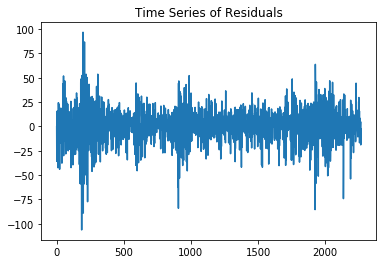

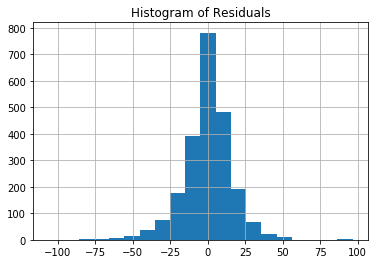

In [28]:
residuals = pd.DataFrame(model4.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

When we look at these residuals plots, we can make two reasonable assumptions. Firstly, there isn't a clear trend in the residuals. There are definitely places of higher volatility, and our model could be expanded to include not time series elements that could account for that variation (by that we mean typical regression coefficients as we did in the linear modeling sections before, though this would require a dataset that includes such features). However, there isn't a clear trend to the data indicating an obviously missed seasonality.

Secondly, our residuals seem approximately standard normal. There is a very long tail on the lower end, but that is a very small number of observations that are likely outliers or caused by some external influence.

## Interpreting the ARIMA (1,0,1)

Before we move on to the Challenge for this section, let's return to model interpretation. We've spent this time building models, but we haven't really talked about what our output means. Our ARIMA(1,0,1) is makes a good example for a quick interpretation.

Firstly, the constant is approximately 1700. Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being 0.9994. The moving average term is approximately -0.0787, meaning that by incorporating the moving average term in the model, the error present in the model will be reduced by about 8% per day. The moving average part indicates that the regression error is actually a linear combination of error terms whose values occurred both in the current time lag and at various times in the past.

Can you interpret the output of one of the other models? What about ARIMA(1,1,1)? Which do you prefer? Then try some of your own coefficients below.

## Interpreting the ARIMA (1,1,1)
<br><span style="color:blue">
With ARIMA(1,1,1) we see the constant drop several orders of magnitude as we expect the the pvalue for that also increases to 0.22.  This tells us that the noise constant is not statistically significant in modeling the differential.<br><br>We can also tell the general correlation these factors have on the differential.  As we saw with the raw trend, the AR has a positive correlation with the diff and the noise constant is also positive.  This leaves the MA term as the sole negative term, which tells us that only an extremely high past error bias can cause the model to predict a negative differential.</span>